In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize


print(os.listdir("C:/Users/20115/Desktop/chest_xray"))
print(os.listdir("C:/Users/20115/Desktop/chest_xray/chest_xray/train/"))
TRAIN_DIR = "C:/Users/20115/Desktop/chest_xray/chest_xray/train/"
TEST_DIR =  "C:/Users/20115/Desktop/chest_xray/chest_xray/test/"

def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

X_train, y_train = get_data(TRAIN_DIR)
X_test , y_test = get_data(TEST_DIR)
print(X_train.shape,'\n',X_test.shape)
print(y_train.shape,'\n',y_test.shape)


    

  0%|          | 0/1342 [00:00<?, ?it/s]

['chest_xray', 'test', 'train', '__MACOSX']
['.DS_Store', 'NORMAL', 'PNEUMONIA']


100%|██████████| 390/390 [00:30<00:00, 12.67it/s]

(5216, 150, 150, 3) 
 (624, 150, 150, 3)
(5216,) 
 (624,)


In [5]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [21]:
print(y_train.shape,'\n',y_test.shape)


(5216, 2) 
 (624, 2)


In [58]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")





(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


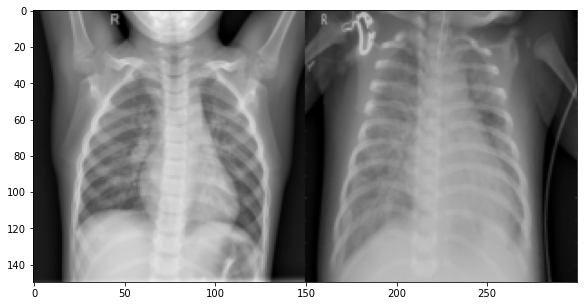

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


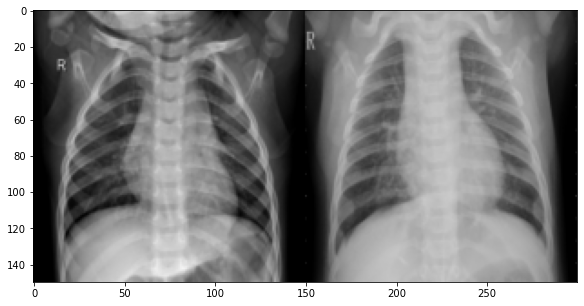

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


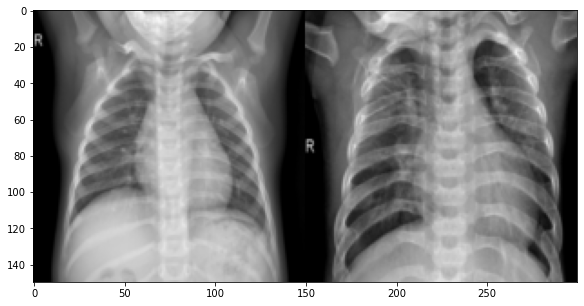

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


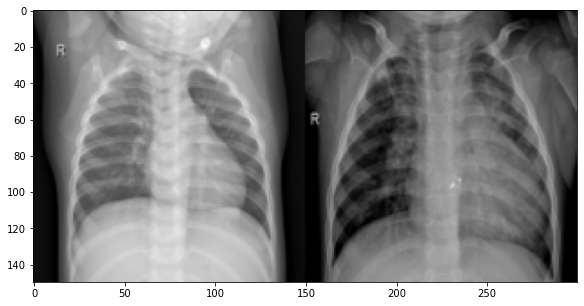

In [98]:
from matplotlib import pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(1,5):
    plotter(i)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



None
Traceback (most recent call last):
  File "C:\Users\20115\Anaconda3\envs\Covid\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-93e6c8513898>", line 2, in <module>
    plotter(i)
  File "<ipython-input-82-338cdfc4468d>", line 5, in plotter
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
  File "C:\Users\20115\Anaconda3\envs\Covid\lib\site-packages\skimage\transform\_warps.py", line 91, in resize
    input_shape = image.shape
AttributeError: 'NoneType' object has no attribute 'shape'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\20115\Anaconda3\envs\Covid\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of t

AttributeError: 'NoneType' object has no attribute 'shape'